In [1]:
import pandas as pd

In [2]:
from fastai.vision import *
from fastai.vision.gan import *

In [3]:
from src.config.config import *
from src.models.wgan import *
from src.attributes import *

## Setup

In [4]:
models = pd.read_csv(path_models + 'model_stats.csv')

In [5]:
models

,Id,Model,Date


In [6]:
#model_id = create_model_id(models)
model_id = '43833e'
model_type = 'wgan'

In [12]:
setup_data_directory (model_id, model_type, ['generated_masks'])

In [13]:
setup_models_directory(model_type, ['generator', 'critic'])

### Look at training data

In [7]:
training_data = pd.read_csv(path_trainingset)

In [8]:
training_data.head()

,Image,Mask,is_validation
0,ISIC_0013678.jpg,ISIC_0013678_segmentation.png,True
1,ISIC_0014610.jpg,ISIC_0014610_segmentation.png,True
2,ISIC_0011149.jpg,ISIC_0011149_segmentation.png,True
3,ISIC_0000493.jpg,ISIC_0000493_segmentation.png,False
4,ISIC_0001449.jpg,ISIC_0001449_segmentation.png,False


## Generate masks

#### Create databunch

In [9]:
data = (GANItemList.from_df(path=path_mask, df=training_data.drop(['Image', 'is_validation'], axis = 1), noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=None, size=128, tfm_y=True)
               .databunch(bs=128)
               .normalize(stats = [torch.tensor([0.5, 0.5, 0.5]), torch.tensor([0.5, 0.5, 0.5])], do_x=False, do_y=True))

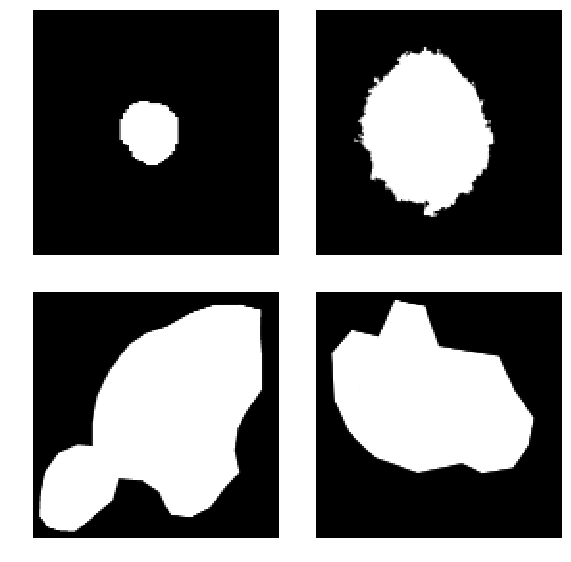

In [6]:
data.show_batch(rows=2)

#### Create the GAN model

In [4]:
generator = basic_generator(in_size=img_size, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=img_size, n_channels=3, n_extra_layers=1)

In [11]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                    opt_func = partial(optim.Adam, betas = (0., 0.99)), wd=0.)

#### Train the GAN model

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.039207,#na#,0.061030,-0.054904,02:32
1,-0.031757,#na#,0.064233,-0.051314,02:32
2,-0.055016,#na#,0.055672,-0.076761,02:33
3,-0.075692,#na#,0.071747,-0.100780,02:32
4,-0.099228,#na#,0.044363,-0.122579,02:34
5,-0.117124,#na#,0.031545,-0.139794,02:36
6,-0.094277,#na#,0.037634,-0.116828,02:31
7,-0.051701,#na#,0.082402,-0.088272,02:32
8,-0.038562,#na#,0.075642,-0.070207,02:33
9,-0.043673,#na#,0.067614,-0.068603,02:30


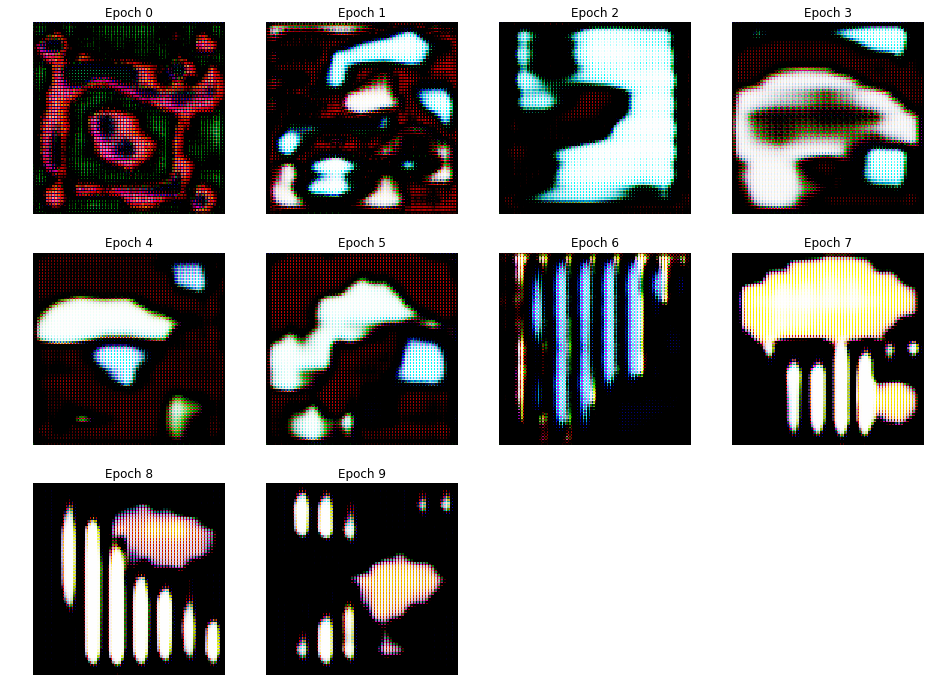

In [26]:
learn.fit(10 ,2e-2)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.148415,#na#,0.009817,-0.169790,02:29
1,-0.075242,#na#,0.009361,-0.092878,02:31
2,-0.052465,#na#,0.029143,-0.072509,02:31
3,-0.062741,#na#,0.035369,-0.082728,02:30
4,-0.062333,#na#,0.055313,-0.088928,02:34
5,-0.054612,#na#,0.050661,-0.078489,02:32
6,-0.055281,#na#,0.060580,-0.080519,02:30
7,-0.041302,#na#,0.064692,-0.067292,02:34
8,-0.036909,#na#,0.060902,-0.060767,02:32
9,-0.042134,#na#,0.071910,-0.068219,02:29


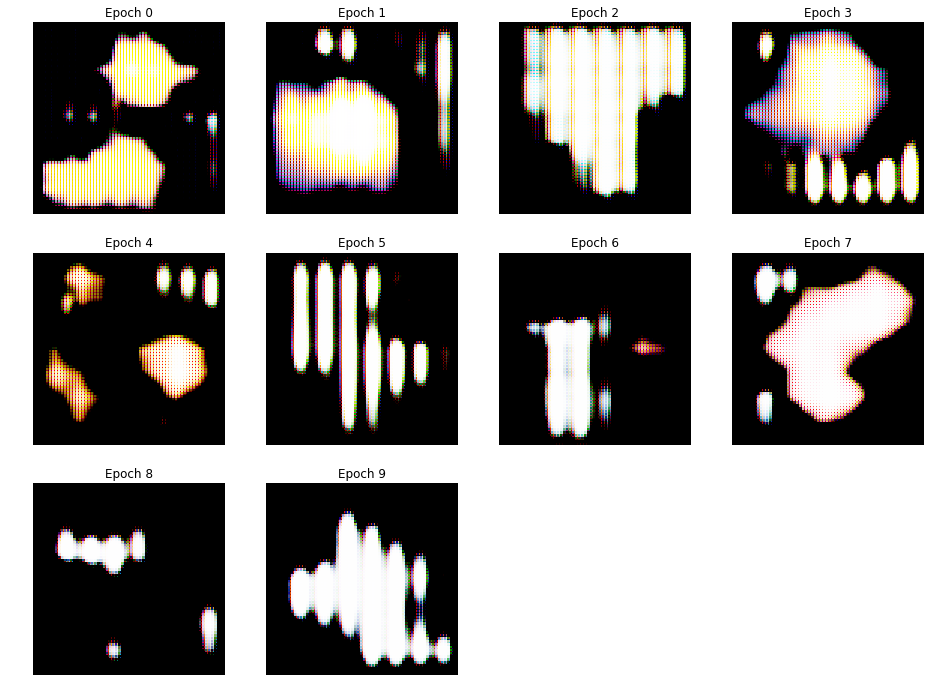

In [27]:
learn.fit(10 ,2e-2)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.061041,#na#,-0.001470,-0.070049,02:34
1,-0.054580,#na#,-0.008352,-0.065861,02:32
2,-0.040592,#na#,0.023876,-0.057169,02:34
3,-0.033916,#na#,0.032780,-0.049258,02:28
4,-0.036227,#na#,0.002733,-0.043441,02:35
5,-0.053327,#na#,-0.015939,-0.056482,02:32
6,-0.042903,#na#,-0.009429,-0.048329,02:31
7,-0.041245,#na#,-0.005153,-0.048414,02:30
8,-0.048789,#na#,-0.017841,-0.051604,02:34
9,-0.043002,#na#,-0.023539,-0.043689,02:31


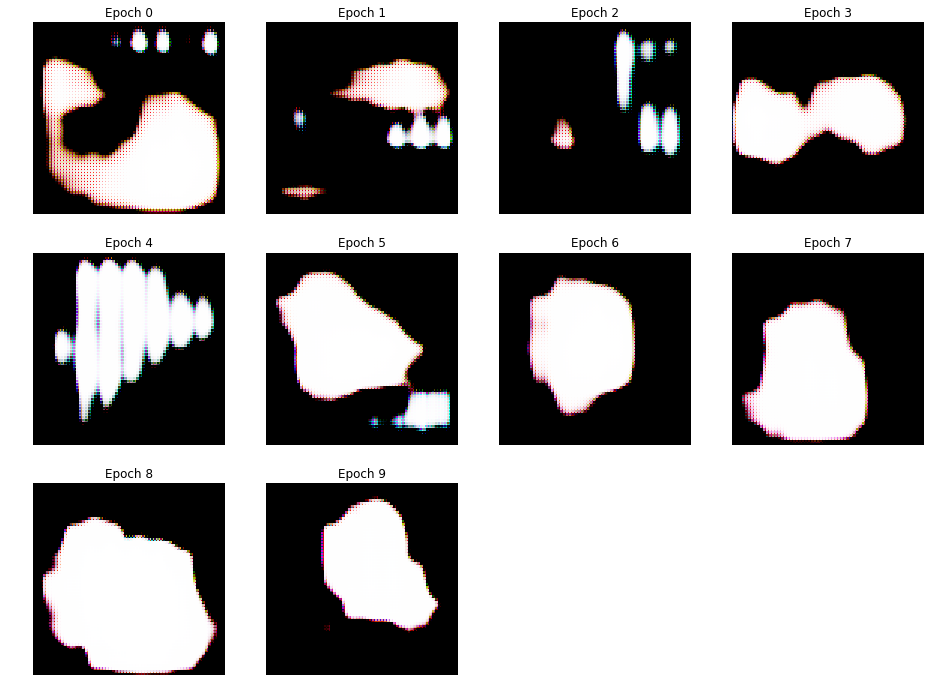

In [28]:
learn.fit(10 ,2e-2)

Save model

In [1]:
#torch.save(generator, path_models + '/generator/' + model_type + '/' + model_id + '.pth')
#torch.save(critic.state_dict(), path_models + '/critic/' + model_type + '/' + model_id + '.pth')


In [14]:
model_id

'43833e'

In [3]:
torch.cuda.current_device()

RuntimeError: cuda runtime error (30) : unknown error at /opt/conda/conda-bld/pytorch_1556653215914/work/aten/src/THC/THCGeneral.cpp:51

Load model

In [7]:
generator = torch.load(path_models + '/generator/' + model_type + '/' + model_id + '.pth')
#critic.load_state_dict(torch.load(path_models + '/critic/' + model_type + '/' + model_id + '.pth'))
#critic.to("cuda")

#### Save predictions

In [8]:
save_pred(generator, path_gen + '/generated_masks/' + model_type + '/' + model_id, 3000)

RuntimeError: cuda runtime error (30) : unknown error at /opt/conda/conda-bld/pytorch_1556653215914/work/aten/src/THC/THCGeneral.cpp:51

#### Clean images

In [21]:
image_cleaner(path_gen + '/generated_masks')